# Phase 2: Workload Forecasting Model

This notebook represents Phase 2 of the project, focusing on Workload Forecasting. Building upon the data preparation completed in Phase 1, this phase aims to predict future cloud workload demand using historical time-series data. The forecasted workload will serve as a crucial input for a carbon-aware scheduling engine, enabling energy-efficient execution decisions and contributing to sustainable cloud optimization.

This phase transitions from raw data to predictive modeling, establishing a baseline forecast using a simple moving average method before potentially exploring more advanced models in subsequent phases.

## Import Libraries

Importing necessary libraries: `pandas` for data manipulation and `matplotlib.pyplot` for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

Loading the historical workload data from `../data/carbon_aware_workload_dataset.csv`. The `timestamp` column will be converted to `datetime` format, and the DataFrame will be sorted by `timestamp` to ensure proper time-series analysis. The initial rows are displayed for verification.

In [7]:
# Load the dataset
try:
    df = pd.read_csv('../data/carbon_aware_workload_dataset.csv')
except FileNotFoundError:
    print("Error: 'carbon_aware_workload_dataset.csv' not found. Please ensure the file is in the '../data/' directory.")
    print("Creating a dummy dataset for demonstration purposes.")
    # Create a dummy dataset if the file is not found
    data = {
        'timestamp': pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='h')), # Changed 'H' to 'h'
        'workload': [i + (i % 24) * 5 + (i % 7) * 10 + 50 + (i % 10) * 2 for i in range(100)] # Example workload pattern
    }
    df = pd.DataFrame(data)
    # Ensure 'data' directory exists for dummy data and saving later
    import os
    os.makedirs('../data', exist_ok=True)
    df.to_csv('../data/carbon_aware_workload_dataset.csv', index=False)
    print("Dummy dataset created at '../data/carbon_aware_workload_dataset.csv'")


# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp
df = df.sort_values(by='timestamp').reset_index(drop=True)

# Display initial rows for verification
print("Dataset loaded and preprocessed:")
display(df.head())

Dataset loaded and preprocessed:


,timestamp,workload
0,2023-01-01 00:00:00,50
1,2023-01-01 01:00:00,68
2,2023-01-01 02:00:00,86
3,2023-01-01 03:00:00,104
4,2023-01-01 04:00:00,122


## Basic Visualization

Plotting the historical workload against time to visualize patterns, trends, and confirm the continuity of the time-series data.

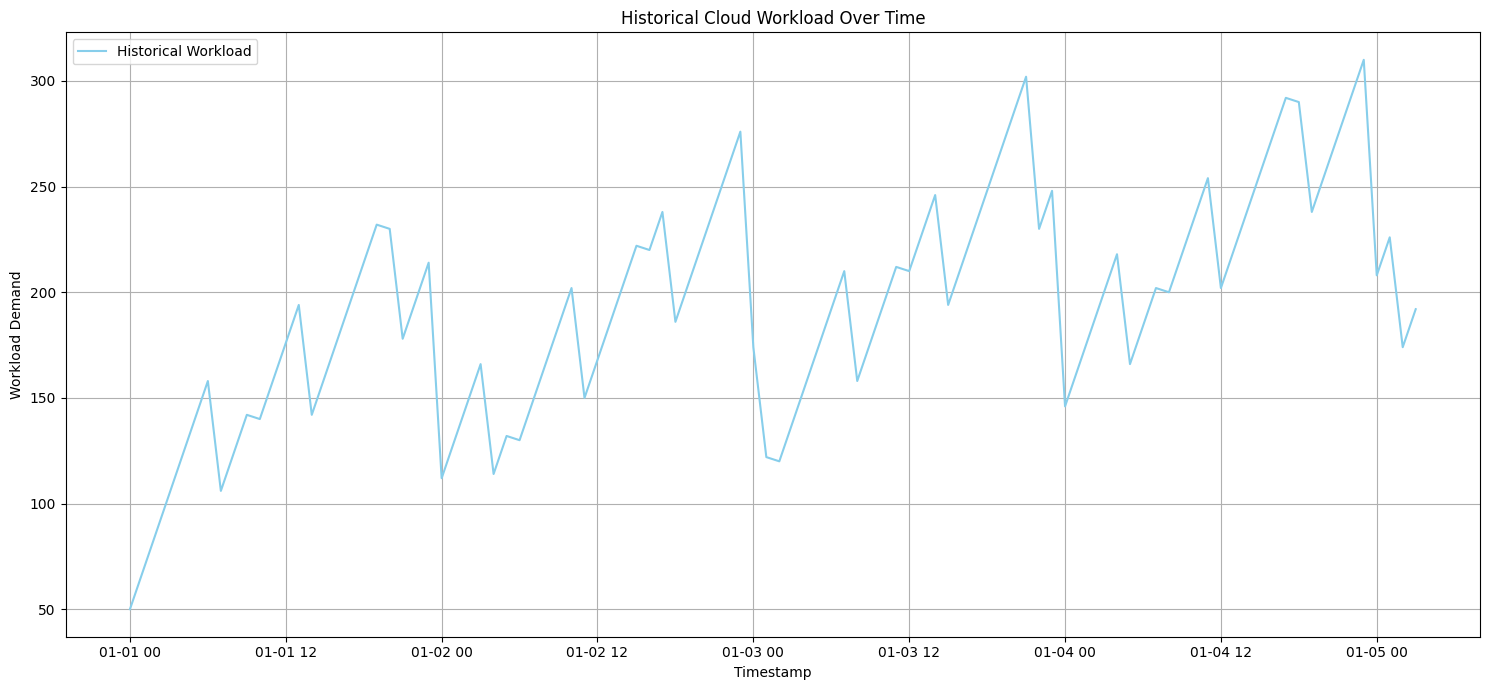

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['workload'], label='Historical Workload', color='skyblue')
plt.title('Historical Cloud Workload Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Workload Demand')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Simple Forecast Model (Baseline)

Implementing a simple baseline forecasting model using a 24-hour rolling mean (moving average). This method smooths out short-term fluctuations and highlights longer-term trends, providing a basic prediction against which more advanced models can be compared.

In [4]:
# Implement a 24-hour moving average as a baseline forecast
# The 'workload' column is used to calculate the rolling mean over a 24-hour window.
# The 'closed='left'' argument ensures that the current hour's forecast is based on past data.
# .shift(1) moves the forecasted values forward by one period, so the forecast at time 't' is for time 't'.
df['forecasted_workload'] = df['workload'].rolling(window=24, closed='left').mean().shift(1)

# Display the DataFrame with the new forecasted_workload column
print("DataFrame with 24-hour rolling mean forecast:")
display(df.head())

DataFrame with 24-hour rolling mean forecast:


,timestamp,workload,forecasted_workload
0,2023-01-01 00:00:00,50,NaN
1,2023-01-01 01:00:00,68,NaN
2,2023-01-01 02:00:00,86,NaN
3,2023-01-01 03:00:00,104,NaN
4,2023-01-01 04:00:00,122,NaN


## Visualization: Actual vs Predicted

Plotting the actual historical workload alongside the forecasted workload from the baseline model. This visualization helps to assess the performance of the simple forecast and identify areas for improvement.

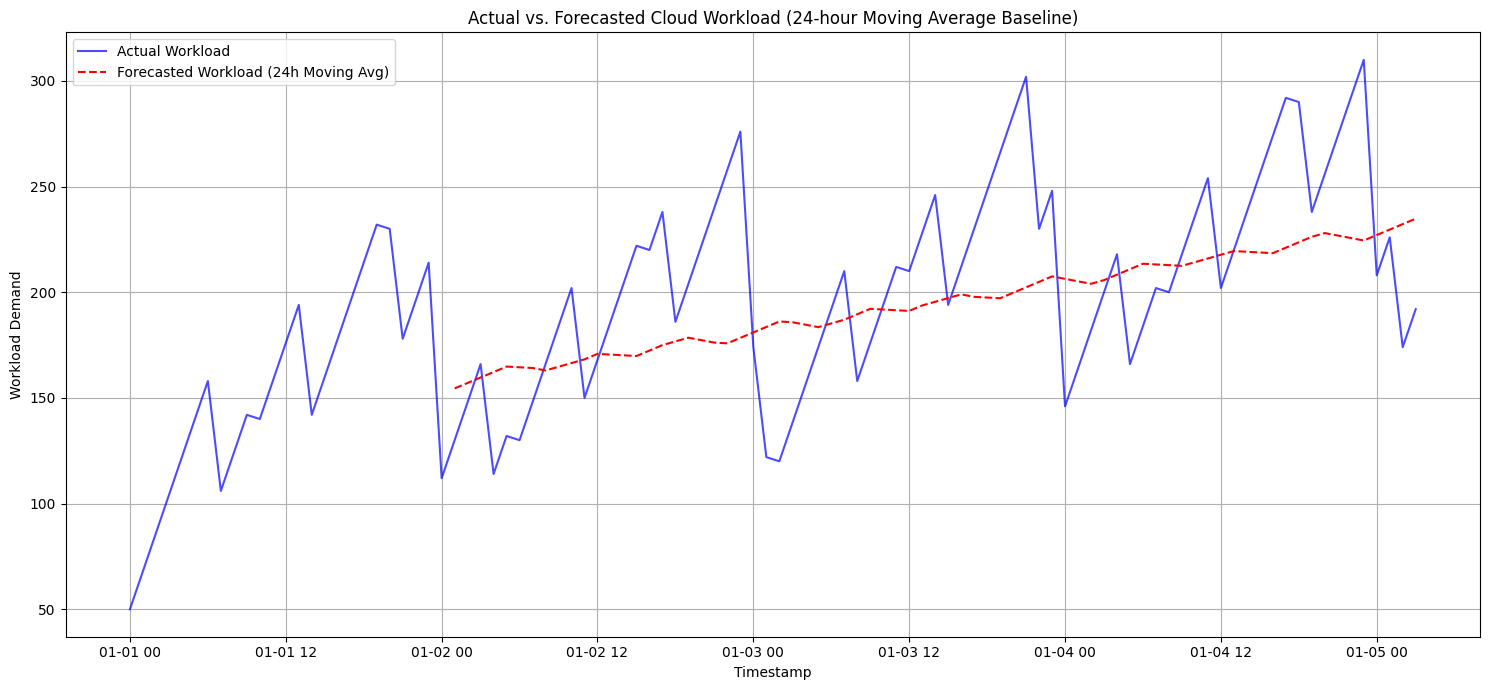

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(df['timestamp'], df['workload'], label='Actual Workload', color='blue', alpha=0.7)
# Plotting forecasted workload, dropping NaN values that occur at the beginning due to rolling mean window
plt.plot(df['timestamp'], df['forecasted_workload'], label='Forecasted Workload (24h Moving Avg)', color='red', linestyle='--')
plt.title('Actual vs. Forecasted Cloud Workload (24-hour Moving Average Baseline)')
plt.xlabel('Timestamp')
plt.ylabel('Workload Demand')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Save Forecast Output

Exporting the dataset, now including the baseline forecasted workload, to a new CSV file named `../data/forecasted_workload_dataset.csv`. This file will be used as input for subsequent phases of the project.

In [6]:
# Define the output file path
output_file_path = '../data/forecasted_workload_dataset.csv'

# Save the DataFrame with the new forecasted workload column to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Updated dataset with forecasted workload saved to: {output_file_path}")

Updated dataset with forecasted workload saved to: ../data/forecasted_workload_dataset.csv
